# Desafío Ciencia de Datos
### Sirai Juan

<img src=https://www.peoplehr.com/assets/images/about/Illustration%20Header_About.svg>

### Introducción
La presente notebook fue confeccionada en el contexto de un challange de Data Science, y consistió en analizar un dataset de HR, a fin de obtener una perspectiva más clara y poder desarrollar un modelo predictivo con foco en el attrition.

### Contenido: 
* [Importación de los datos](#section_a)
* [Acercamiento descriptivo](#section_b)
* [Definicion del modelo](#section_c)
* [Prediciendo nuevos valores](#section_d)
* [Conclusiones](#section_e)
* [Submission](#section_f)

### Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

<a id="section_a"></a> 
### Importamos dataset

In [59]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head(3)

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario,se_fue
0,2876.0,0.63,0.84,3,269,2,0,0,gestión de productos,bajo,no
1,7883.0,0.11,0.93,7,284,4,0,0,tecnica,bajo,si
2,4089.0,0.60,0.42,2,109,6,0,0,ventas,bajo,no


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   8000 non-null   float64
 1   nivel_de_satisfaccion                8000 non-null   float64
 2   ultima_evaluacion                    8000 non-null   float64
 3   cantidad_proyectos                   8000 non-null   int64  
 4   promedio_horas_mensuales_trabajadas  8000 non-null   int64  
 5   años_en_la_empresa                   8000 non-null   int64  
 6   tuvo_un_accidente_laboral            8000 non-null   int64  
 7   promociones_ultimos_5_anios          8000 non-null   int64  
 8   area                                 8000 non-null   object 
 9   salario                              8000 non-null   object 
 10  se_fue                               8000 non-null   object 
dtypes: float64(3), int64(5), objec

None

In [5]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
ID,8000.0,5001.856375,2879.555515,1.00,2513.50,4994.50,7498.25,10000.0
nivel_de_satisfaccion,8000.0,0.611250,0.248972,0.09,0.44,0.64,0.82,1.0
ultima_evaluacion,8000.0,0.717285,0.171529,0.36,0.56,0.72,0.87,1.0
cantidad_proyectos,8000.0,3.802625,1.234447,2.00,3.00,4.00,5.00,7.0
promedio_horas_mensuales_trabajadas,8000.0,201.246125,50.055105,96.00,156.00,201.00,245.00,310.0
años_en_la_empresa,8000.0,3.495375,1.476483,2.00,3.00,3.00,4.00,10.0
tuvo_un_accidente_laboral,8000.0,0.148750,0.355864,0.00,0.00,0.00,0.00,1.0
promociones_ultimos_5_anios,8000.0,0.022375,0.147909,0.00,0.00,0.00,0.00,1.0


A priori, vemos que son correctos los tipos de datos que importamos, con excepción de la variable **"se fue"** (nuestra variable target) que es de tipo string. En los próximos pasos la convertiremos para entrenar el modelo a un tipo booleano (0/1).
La columna ID no es del todo necesaria, si bien la mantendremos para los próximos pasos luego no la utilizaremos en el modelo de aprendizaje.

No tenemos valores nulos, con lo cual no requeriremos de estrategias de fill.



<a id="section_b"></a> 
### Acercamiento descriptivo al dataset

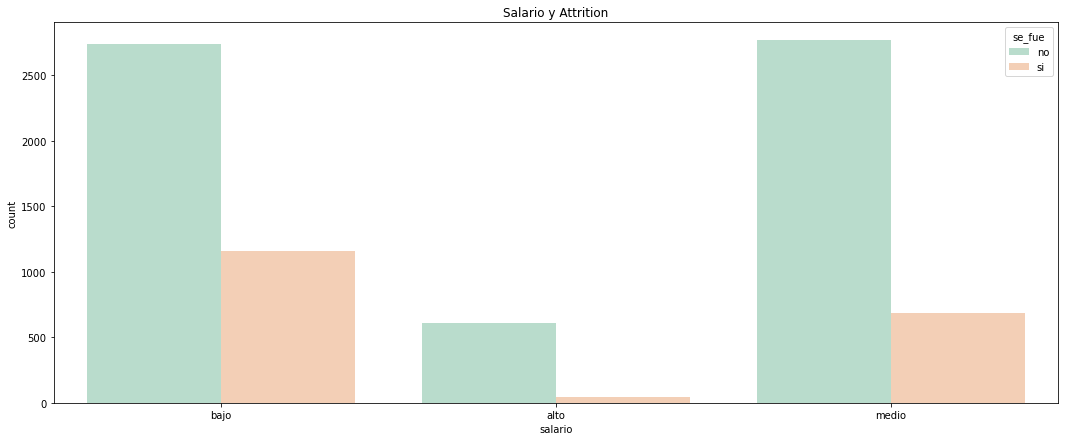

In [6]:
plt.figure(figsize=(18,7))
sns.countplot(data= df, x='salario',  hue='se_fue', palette='Pastel2')
plt.title('Salario y Attrition');

Podemos ver como si bien tenemos cantidades similares de empleados en niveles salariales bajos y medios, se hace mas notorio el attrition en niveles bajos.

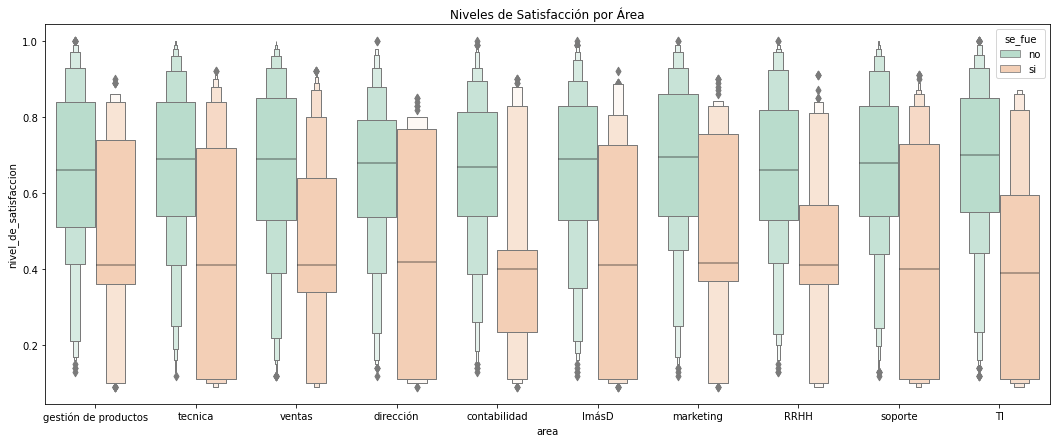

In [7]:
plt.figure(figsize=(18,7))
sns.boxenplot(data= df, x='area', y='nivel_de_satisfaccion', hue='se_fue', palette='Pastel2')
plt.title('Niveles de Satisfacción por Área');

Un hallazgo interesante, es que los colaboradores que decidieron abandonar la empresa en las distintas áreas, muestran menores niveles de satisfacción que sus colegas que decidieron quedarse.

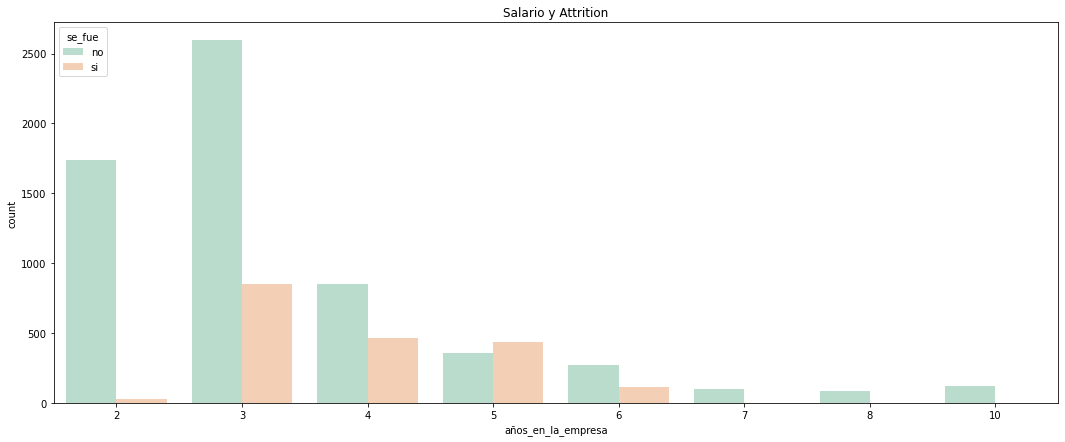

In [8]:
plt.figure(figsize=(18,7))
sns.countplot(x=df['años_en_la_empresa'],  hue=df['se_fue'], palette='Pastel2')
plt.title('Salario y Attrition');

Al analizar las renuncias de empleados a lo largo de su trayectoria laboral, vemos que entre los años 3 y 5 de antiguedad se produce el mayor éxodo de empleados.

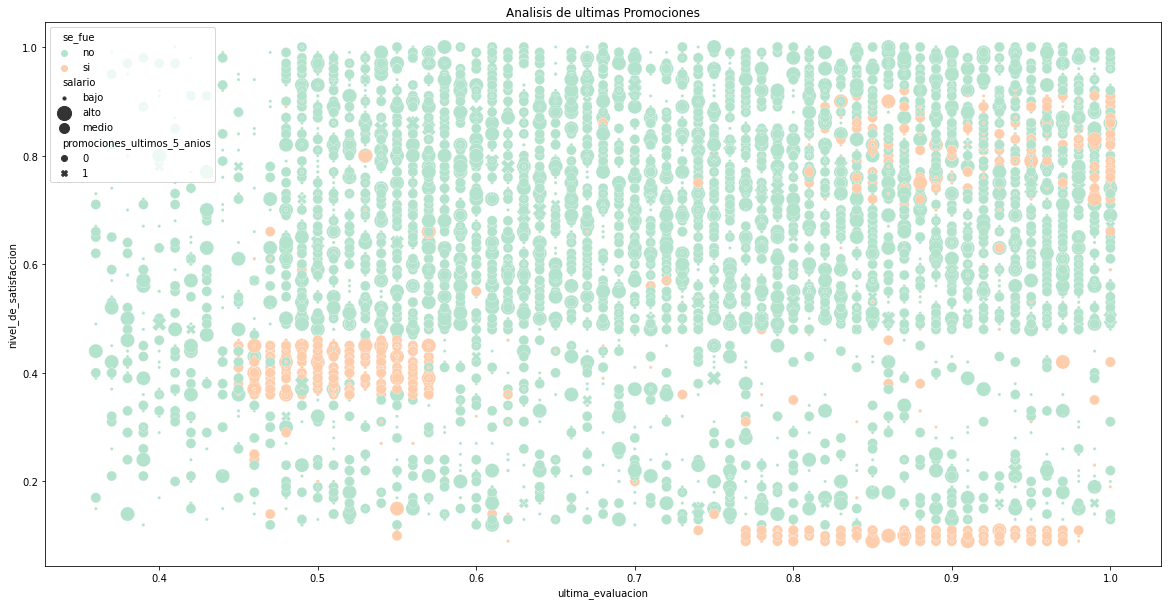

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x = 'ultima_evaluacion', y='nivel_de_satisfaccion', 
                style='promociones_ultimos_5_anios', size='salario', hue='se_fue', sizes=[10,200,100],palette='Pastel2')
plt.title('Analisis de ultimas Promociones');

Al analizar en conjunto el nivel de satisfacción, última evaluación, salario y promociones en los últimos 5 años, podemos ver lo siguiente:
* Hay 3 grupos claramente diferenciados de trabajadores que decidieron renunciar:
 * Trabajadores incomprendidos: son aquellos de desempeño medio, y bajo nivel de satisfacción. Una potencial hipótesis es que pueden no haber encontrado motivación suficiente para mejorar su performance, entrando en un circulo vicioso de evaluaciones bajas y baja motivación.
 * Estrellas Fugaces: una forma un tanto pintoresca para referirnos a aquellos trabajadores de excelente desempeño, pero muy baja motivación que han decidido retirarse.
 * Incógnitas: buen desempeño, buen nivel de satisfacción, salarios medios y aún así han decidido dar un paso al costado. Quizás este sea el caso de las renuncias sanas, en las cuales el trabajador ha obtenido una propuesta superadora, o ha visto su ciclo cumplido dentro de la compañía y decidió retirarse de la mejor manera.

* No existe una realación tan marcada entre nivel salarial y renuncias. Es cierto que predomina en niveles medios y bajos, pero depende mucho de la cantidad de trabajadores que tenemos en cada escala salarial.
* Si es llamativo que parecen haber pocas promociones en los ultimos 5 años, y la mayor parte de quienes decidieron renunciar no han sido promocionados.

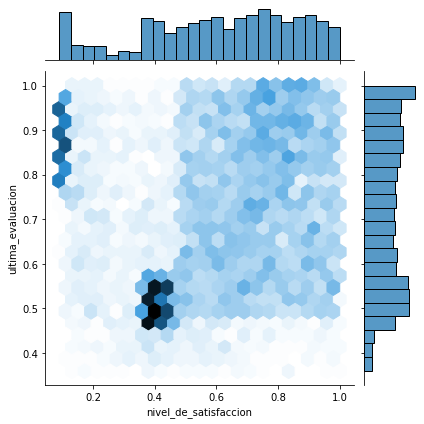

In [10]:
sns.jointplot(x='nivel_de_satisfaccion', y='ultima_evaluacion',data=df, kind="hex", palette='Pastel2');

Del anterior gráfico, podemos ver que tenemos un nivel de satisfacción predominantemente bueno, y un promedio de evaluacion de desempeño que se acerca al puntaje medio.
Como un primer insight, vemos que hay dos grupos particularmente definidos en donde tanto el nivel de satisfaccion como el score se acerca a niveles medios (empleados estándar) , pero un grupo mas llamativo en donde si bien el score de desempeño es muy bueno, su nivel de satisfaccion no lo es

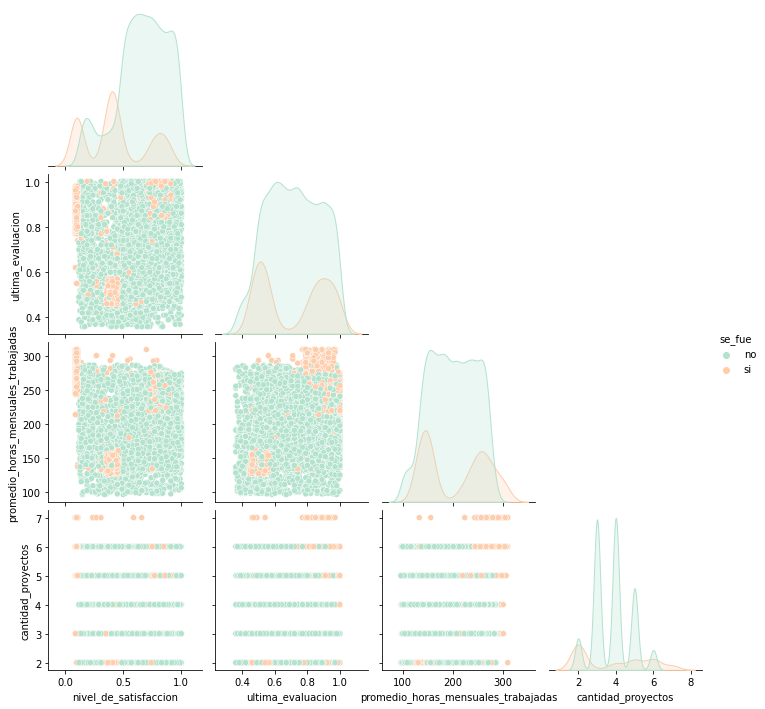

In [11]:
sns.pairplot(df[['nivel_de_satisfaccion','ultima_evaluacion',
                       'promedio_horas_mensuales_trabajadas','cantidad_proyectos','se_fue']], 
             corner=True, hue='se_fue',palette='Pastel2')

Luego de hacer un pairplot entre distintas variables cuantitativas, podemos esbozar las siguientes observaciones:
* A nivel general la satisfacción laboral es buena, mostrando una distribución con asimetría negativa. Sin embargo, para aquellos colaboradores que abandonaron la organización, la distribución se muestra más concentrada en niveles bajos.
* Asi como en el gráfico anterior veíamos que sobresalía un grupo de trabajadores de muy buen rendimiento, pero baja satisfacción laboral, en este gráfico podemos observar que la mayor parte de ellos han abandonado la organización (grafico cuadrante (1, 2).
* En el cuadrante (1,3) vemos como un grupo con niveles de satisfacción bajos y muchas horas trabajadas ha abandonado la organización, y el la figura siguiente (cuadrante (2,3) vemos como quienes han abandonado la empresa son trabajadores con buen desempeño y gran cantidad de horas trabajadas.

Podríamos plantear una hipótesis preliminar, de que tanto el nivel de exigencia (en cuanto a horas o participación en proyectos) y el desempeño están relacionados de alguna manera con la decisión del colaborador de retirarse. Vemos como un interesante grupo de trabajadores, cuyo desempeño fue muy bueno, pero a su vez se vió sobre exigido, decidió dar un paso al costado.

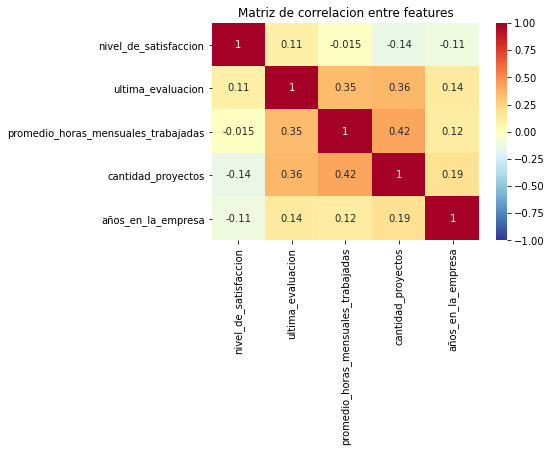

In [12]:
sns.heatmap(df[['nivel_de_satisfaccion','ultima_evaluacion',
                   'promedio_horas_mensuales_trabajadas','cantidad_proyectos','años_en_la_empresa']].corr(), 
            annot=True, vmin=-1, vmax=1, cmap='RdYlBu_r')
plt.title('Matriz de correlacion entre features');

<a id="section_c"></a> 
### Definición del modelo

In [13]:
# Creamos una funcion para hacer un pequeño procesamiento al dataset
def procesarDataset(df):
    #mapeo_escala = {"bajo":1, "medio":2, "alto":3}
    #df["escala_salario"] = df["salario"].replace(mapeo_escala)
    mapeo_attrition = {"no":0, "si":1}
    df["target"] = df["se_fue"].replace(mapeo_attrition)
    df=df.set_index('ID', inplace=True)
    return (df)

In [14]:
procesarDataset(df)

In [15]:
df.head()

,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario,se_fue,target
ID,,,,,,,,,,,
2876.0,0.63,0.84,3,269,2,0,0,gestión de productos,bajo,no,0
7883.0,0.11,0.93,7,284,4,0,0,tecnica,bajo,si,1
4089.0,0.60,0.42,2,109,6,0,0,ventas,bajo,no,0
8828.0,0.38,0.49,4,196,3,0,1,dirección,alto,no,0
9401.0,0.11,0.83,6,244,4,0,0,contabilidad,bajo,si,1


In [16]:
# vamos a eliminar las features que no utilizaremos en el modelo
df_model = df.drop(['se_fue'], axis=1)
##creamos variables dummies 
df_model = pd.get_dummies(df_model, drop_first=True)

In [17]:
df_model.columns

Index(['nivel_de_satisfaccion', 'ultima_evaluacion', 'cantidad_proyectos',
       'promedio_horas_mensuales_trabajadas', 'años_en_la_empresa',
       'tuvo_un_accidente_laboral', 'promociones_ultimos_5_anios', 'target',
       'area_RRHH', 'area_TI', 'area_contabilidad', 'area_dirección',
       'area_gestión de productos', 'area_marketing', 'area_soporte',
       'area_tecnica', 'area_ventas', 'salario_bajo', 'salario_medio'],
      dtype='object')

In [18]:
# Separo el dataset en nuestro array target, y nuestro dataset de features
X_model= df_model.drop(['target'], axis=1)
y_model= df_model.target

### Train, test, split

<img src=https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png>

In [19]:
X_train, X_validation, y_train, y_validation = train_test_split(X_model, y_model, test_size=0.30,
                                                                random_state=42, stratify=y_model)

In [20]:
display(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5600, 18)

(2400, 18)

(5600,)

(2400,)

In [21]:
##creamos una funcion para ir evaluando los modelos
def model_performance(model, name, X, y, cv):
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    print("Performance of {}:\t{:0.3} ± {:0.3}".format( \
        name, s.mean().round(3), s.std().round(3)))

### Desbalanceo de clases

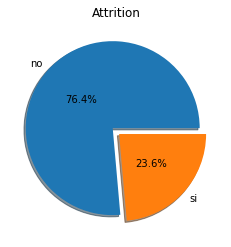

In [22]:
plt.title('Attrition')
labels = list(df.groupby("se_fue")['target'].count().keys())
plt.pie(x=df.groupby("se_fue")['target'].count(), 
        autopct="%.1f%%",  labels=labels, radius=1,pctdistance=0.5, explode=[0.05]*2, shadow=True);

Debido a que tenemos clases desbalanceadas, implementaremos un mecanismo de balanceo, a partir de generar valores ficticios de la clase minoritaria

In [23]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('training set:')
print(y_train_os.value_counts())

print('\nValidation set:')
print(y_validation.value_counts())

training set:
1    4278
0    4278
Name: target, dtype: int64

Validation set:
0    1834
1     566
Name: target, dtype: int64


### Desarrollando el modelo

**Gradient Boost:**

Gradient boosting es un método de aprendizaje lento donde los sucesivos modelos de árboles de decisión son entrenados para predecir los residuales del árbol antecesor permitiendo que los resultados de los modelos subsiguientes sean agregados y corrijan los errores promediando las predicciones. Para determinar los parámetros que tendrán cada uno de los árboles de decisión agregados al modelo se utiliza un procedimiento descenso por gradiente que minimizará la función de perdida. De esta forma se van agregando árboles con distintos parámetros de forma tal que la combinación de ellos minimiza la pérdida del modelo y mejora la predicción. 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
gb_os = GradientBoostingClassifier()
params_gb_os = {'n_estimators':[500, 1000] , 
             'learning_rate':[0.001, 0.001, 0.1],
            'max_depth' : [1, 2, 3, 4]}

grid_gb_os = GridSearchCV(gb_os, param_grid=params_gb_os, cv=cv, verbose=1, n_jobs=3)

In [28]:
grid_gb_os.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  4.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.001, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [29]:
model_performance(grid_gb_os.best_estimator_, "GradientBoostingClassifier", X_train_os, y_train_os, cv)

Performance of GradientBoostingClassifier:	0.993 ± 0.002


In [30]:
model_os = grid_gb_os.best_estimator_
model_os

GradientBoostingClassifier(max_depth=4, n_estimators=1000)

In [31]:
importances_os = model_os.feature_importances_

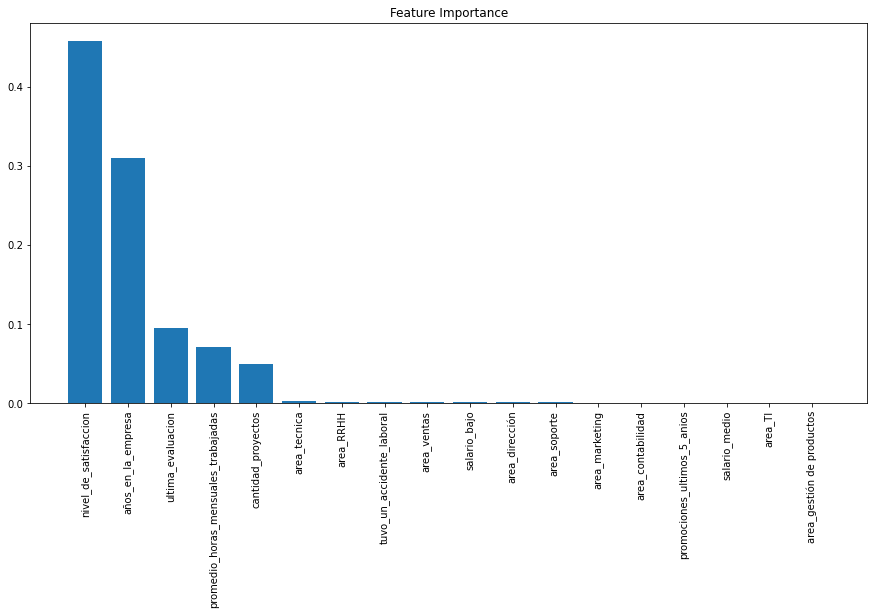

In [32]:

indices = np.argsort(importances_os)[::-1]


names = X_train_os.columns[indices]

plt.figure(figsize=(15,7))


plt.title("Feature Importance")

plt.bar(range(X_train_os.shape[1]), importances_os[indices])

plt.xticks(range(X_train_os.shape[1]), names, rotation=90)


plt.show()

In [33]:
y_pred=grid_gb_os.best_estimator_.predict(X_train_os)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4278
           1       1.00      1.00      1.00      4278

    accuracy                           1.00      8556
   macro avg       1.00      1.00      1.00      8556
weighted avg       1.00      1.00      1.00      8556



Text(0.5, 1.0, 'Confusion Matrix of Train Set')

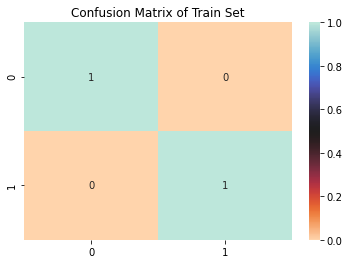

In [35]:
print(classification_report(y_train_os, y_pred))
sns.heatmap(confusion_matrix(y_train_os, y_pred, normalize = 'true'), annot=True, cmap='icefire_r')
plt.title('Confusion Matrix of Train Set')

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

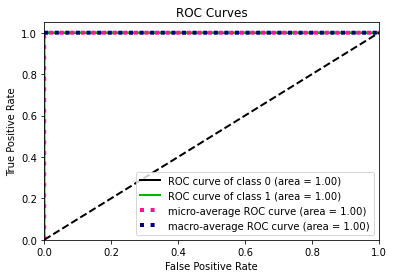

In [36]:
from scikitplot.metrics import plot_roc

plot_roc(y_train_os,grid_gb_os.predict_proba(X_train_os))

<a id="section_d"></a> 
### Prediciendo nuevos valores en el set de validacion

Recordemos que nuestro modelo no conoce los datos que separamos para validación (vendría a funcionar en nuestro caso como un set de testeo), con lo cual es esperable que la precisión disminuya.
Acá es importante tener en cuenta que si el modelo performa muy bien en train, pero el score cae mucho en test, es porque estamos ante un posible caso de overfitting o sobre ajuste (nuestro modelo se ajustó tanto a los datos de prueba, que es incapaz de generalizar en test)

In [37]:
y_pred_validation=grid_gb_os.best_estimator_.predict(X_validation)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1834
           1       0.97      0.96      0.97       566

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



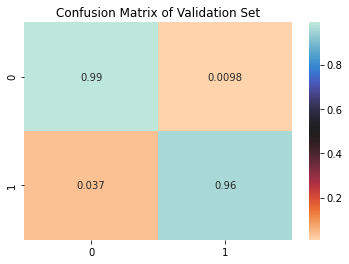

In [38]:
print(classification_report(y_validation, y_pred_validation))
sns.heatmap(confusion_matrix(y_validation, y_pred_validation, normalize = 'true'), annot=True, cmap='icefire_r')
plt.title('Confusion Matrix of Validation Set');

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

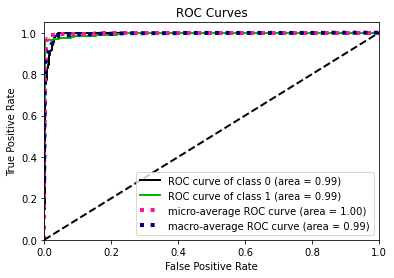

In [39]:
plot_roc(y_validation,grid_gb_os.predict_proba(X_validation))

Finalmente vemos que el score en validación disminuyó ligeramente, pero sigue siendo muy bueno. Podría deberse a que el dataset es relativamente pequeño y de patrones sencillos para un modelo tan poderoso como el gradient boost, o bien estamos ante un posible caso de sobre ajuste. Eso lo veremos luego cuando comparemos contra los datos de test.

<a id="section_e"></a> 
### Conclusiones

* A nivel general la satisfacción laboral es buena. Sin embargo, es notorio como aquellos trabajadores que decidieron abandonar la organización tenían menores niveles de satisfacción laboral que el resto.
* Un poco más alarmante, es que parecería ser que existe una relación entre la satisfacción laboral, antiguedad en la empresa y desempeño del trabajador que llevan a la decisión de renunciar.
* Una observacion adicional, es que la exigencia laboral (en cuanto a horas trabajadas y proyectos) parece tener influencia, quizás no directamente en la decisión de renuncia, pero sí indirectamente en la satisfacción laboral.
* La problemática de attrition es compleja e influenciada por muchísimas variables, tan diversas como heterogéneas las personas que conforman la organización.
* Con los datos de análisis, es claro que la **satisfacción laboral** juega un papel importante, resultando que bajos niveles de satisfacción podrían llevar a la decisión de salida.
* Ahora bien, la baja satisfacción es la causa de la renuncia? O es consecuencia de algo más? Si trabajamos sólo sobre la satisfacción laboral, ignorando los factores que se relacionan con ella, estaremos fracasando.
* En un análisis descriptivo del grupo de colaboradores que decidió abandonar la organización, vimos también como la cantidad de horas trabajadas, el buen desempeño, y la antiguedad en la empresa estaban vinculados tanto con la satisfacción como con la decisión de dar un paso al costado.

### Sugerencias:

* Prestar especial atención a los empleados de buen desempeño, realizar un seguimiento de su trayectoria en la empresa, expectativas laborales.
* Diseñar en conjunto con las áreas planes de carrera orientados a los intereses y skills de los colaboradores. Es importante considerar los intereses de las personas, relativos a su proyección profesional.
* Equilibrar la carga laboral de aquellos empleados de buen desempeño, con las oportunidades de crecimiento.



### Analisis pendientes:
* Probar con otras metodologías de balanceo de la clase minoritaria.
* Probar con estandarizar las variables numéricas a fin de reducir posibles efectos de la varianza.

<a id="section_f"></a> 
### Final:
### Predicciones en TEST para generar el submission file

In [60]:
display(test.head(), test.columns)

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,salario,se_fue
0,2.0,0.40,0.57,2,152,3,0,0,ventas,bajo,NaN
1,4.0,0.54,0.52,3,115,3,0,0,contabilidad,bajo,NaN
2,9.0,0.72,0.87,5,223,5,0,0,ventas,bajo,NaN
3,14.0,0.65,0.67,3,245,3,0,0,ventas,medio,NaN
4,15.0,0.54,0.95,4,256,3,0,0,soporte,bajo,NaN


Index(['ID', 'nivel_de_satisfaccion', 'ultima_evaluacion',
       'cantidad_proyectos', 'promedio_horas_mensuales_trabajadas',
       'años_en_la_empresa', 'tuvo_un_accidente_laboral',
       'promociones_ultimos_5_anios', 'area', 'salario', 'se_fue'],
      dtype='object')

In [61]:
test_model = pd.get_dummies(test) ## el drop first de una de las columnas dummy lo haremos manualmente, para asegurar quedarnos con las mismas que en train

In [63]:
test_model.columns

Index(['ID', 'nivel_de_satisfaccion', 'ultima_evaluacion',
       'cantidad_proyectos', 'promedio_horas_mensuales_trabajadas',
       'años_en_la_empresa', 'tuvo_un_accidente_laboral',
       'promociones_ultimos_5_anios', 'se_fue', 'area_ImásD', 'area_RRHH',
       'area_TI', 'area_contabilidad', 'area_dirección',
       'area_gestión de productos', 'area_marketing', 'area_soporte',
       'area_tecnica', 'area_ventas', 'salario_alto', 'salario_bajo',
       'salario_medio'],
      dtype='object')

In [64]:
X_train_os.columns

Index(['nivel_de_satisfaccion', 'ultima_evaluacion', 'cantidad_proyectos',
       'promedio_horas_mensuales_trabajadas', 'años_en_la_empresa',
       'tuvo_un_accidente_laboral', 'promociones_ultimos_5_anios', 'area_RRHH',
       'area_TI', 'area_contabilidad', 'area_dirección',
       'area_gestión de productos', 'area_marketing', 'area_soporte',
       'area_tecnica', 'area_ventas', 'salario_bajo', 'salario_medio'],
      dtype='object')

In [65]:
X_test =test_model.drop(['se_fue','area_ImásD','salario_alto'], axis=1)

In [68]:
X_test.set_index('ID', inplace=True)

In [71]:
y_pred_final=grid_gb_os.best_estimator_.predict(X_test)

In [73]:
test_model['prediction'] = y_pred_final

In [75]:
submission = test_model[['ID','prediction']]

In [76]:
submission

,ID,prediction
0,2.0,1
1,4.0,0
2,9.0,1
3,14.0,0
4,15.0,0
...,...,...
1995,9980.0,0
1996,9987.0,1
1997,9991.0,1
1998,9996.0,0


In [78]:
submission.to_csv('submission_sirai.csv', index=False)

<img src=https://i.pinimg.com/originals/7e/11/f2/7e11f2750fd1ba9b1bafd4c66e390db6.jpg>